# Building a movie recommender system using Surprise

In [ ]:
### Installing  suprise
! pip3 install scikit-surprise

In [ ]:
## importing packages
from surprise import SVD
from surprise import Dataset, Reader,SVD
from surprise.model_selection import cross_validate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### 1. Load the dataset.

The dataset is from Movielens, with 100,000 rows and 5 columns. 
data recorded in different times.

In [ ]:
# importing the data
data=pd.read_csv('/content/movie_rating.csv')

### 2. Data understanding

In [ ]:
### the head of the data
data.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [ ]:
### the tail of the data
data.tail()

,userId,movieId,rating,timestamp
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898
105338,668,148626,4.5,1451148148


In [ ]:
### data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [ ]:
### the shape of the dataset
data.shape

(105339, 4)

### 3. Data cleaning

In [ ]:
### dropping the Timestamp column
data.drop('timestamp',1,inplace=True)

In [ ]:
### looking for missing values
data.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [ ]:
## looking for duplicates
data.duplicated().any()

False

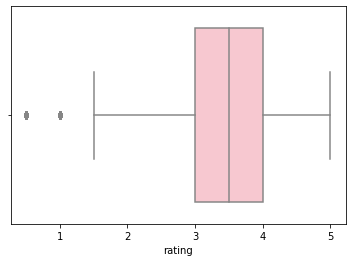

In [ ]:
### ouliers on movie rating column
sns.boxplot(x='rating',data=data,color='pink')

we shall not remove the outliers because that is a 0 rating movie
and a 1 rating movie.

### 4. Exploratory data analysis

In [ ]:
## number of movies rated
num_movies=data['movieId'].nunique()
print(num_movies, 'movies')

10325 movies


In [ ]:
## number of users who rated the movies
num_users=data['userId'].nunique()
print(num_users, 'users')

668 users


In [ ]:
### sparsity of the rating..

## available  rating
available_rating=data['rating'].count()
print('available rating',available_rating)
### total rating
total=num_movies*num_users
print('expected total rating',total)

## missing rating
missing=total-available_rating
print('missing rating',missing)

## sparsity of the rating
sparsity=(missing/total)*100
print('sparsity rating',sparsity)

available rating 105339
expected total rating 6897100
missing rating 6791761
sparsity rating 98.47270591987936


A sparsity rating of 98.47% is really good for our model


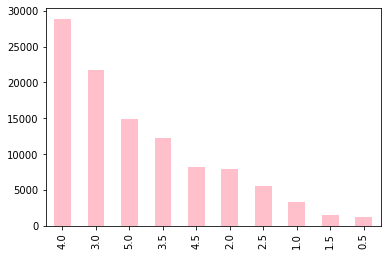

In [ ]:
### rating distribution
data['rating'].value_counts().plot(kind='bar',color='pink')

###  5. Data manipulation

Lets remove movies that have few ratings and users who have few ratings..

This is because its hard to predict movies that have very few ratings and the model will not be able to pickpoint who are suppose to watch that movie and it will affect our model.

Same case to users people who have little number of rating we cant tell easily what type of movie they like.

In [ ]:
 ### filter movies less than 5 ratings
filter_movies=data['movieId'].value_counts() > 5
filter_movies=filter_movies[filter_movies].index.tolist()

In [ ]:
### filter users who have not rated more than 5 movies
filter_user=data['userId'].value_counts() > 5
filter_user=filter_user[filter_user].index.tolist()

In [ ]:
### removing the low rated movies and low rating users
df=data[(data['movieId'].isin(filter_movies)) & (data['userId'].isin(filter_user))]
print('filtered data :-',df.shape)
print('original data :-',data.shape)

filtered data :- (91701, 3)
original data :- (105339, 3)


We have reduced our data with less than 10% which is fine,
our dataset is clean for modelling

### 6. Data preprocessing

Creating train and test datasets

In [ ]:
### creating columns to use for training
col=['userId','movieId','rating']

In [ ]:

 ## creading a reader with our scale 0f 0.5 to 5
reader=Reader(rating_scale=(0.5,5))
## create a  suprise dataset
df2=Dataset.load_from_df(df[col],reader)

In [ ]:
### create prediction set and train set
train=df2.build_full_trainset()
test=train.build_anti_testset()

### 7. Modelling

In [ ]:
## we use singular  value decomposition to create our model.

# lets specify our algorithm
svd=SVD(n_epochs=25,verbose=True)

In [ ]:
## training our model using cross validation
cross_validate(svd,df2,measures=['RMSE','MAE'],cv=5,verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
P

{'fit_time': (5.213434934616089,
  5.172960042953491,
  5.136235952377319,
  5.13006591796875,
  5.1383748054504395),
 'test_mae': array([0.6584739 , 0.65924746, 0.65721292, 0.65782555, 0.66228622]),
 'test_rmse': array([0.85745966, 0.85834641, 0.85159802, 0.85248869, 0.86027342]),
 'test_time': (0.13051724433898926,
  0.36981725692749023,
  0.11884450912475586,
  0.13268804550170898,
  0.29538869857788086)}

From above we can see that we have mean RMSE of 0.8545 and mean MAE of 0.65, which means we have deviated from the actual mean with 0.65 which is not that bad

### 8. Prediction

In [ ]:
### predict using test data
predict=svd.test(test)
predict[1]

Prediction(uid=1, iid=3, r_ui=3.5758225101143934, est=3.0661552409012787, details={'was_impossible': False})

From above we can see that our model is working well,
The details shows that 'was_ impossible : false' , which means the prediction
was possible

The model has predicted that user one would have rated movie with the movieID 3 as 3..